In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
centrality_bridgeness_df = pd.read_csv('../moduland_analysis/HSP_centrality_bridgness.csv')
centrality_bridgeness_df.head()

,nodeID,betweenness centrality,ModuLand bridgeness,log_Cen,log_bridg
0,PSEN2,3175.170110,0.105681,3.501767,-0.976003
1,CAPN1,204823.184900,23.572490,5.311379,1.372405
2,HTT,339323.086200,13.819579,5.530613,1.140495
3,SETD2,2343.498225,0.000441,3.369865,-3.355561
4,HAP1,482.557821,0.006031,2.683549,-2.219611


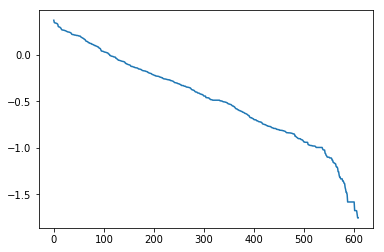

In [3]:
centrality_bridgeness_df['log_bc_ratio'] = centrality_bridgeness_df.log_bridg / centrality_bridgeness_df.log_Cen
centrality_bridgeness_df = centrality_bridgeness_df.sort_values('log_bc_ratio', ascending=False).set_index(np.arange(len(centrality_bridgeness_df.index)))

centrality_bridgeness_df.log_bc_ratio.plot()

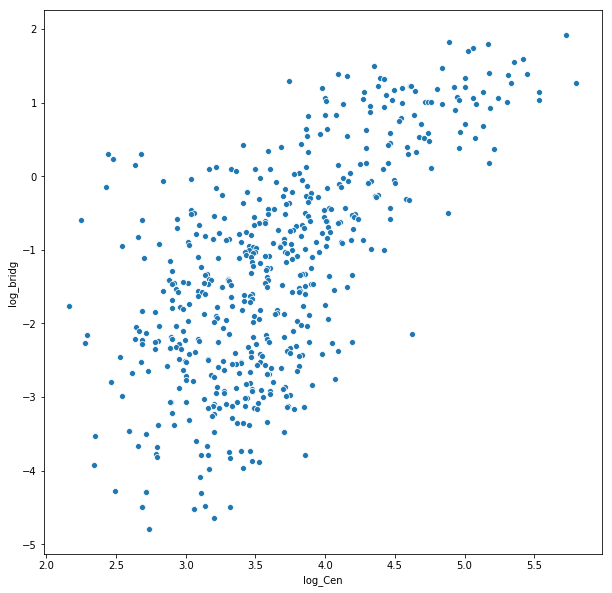

In [10]:
import seaborn as sns

a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='log_Cen', y='log_bridg', data=centrality_bridgeness_df)
sns.pointplot(x=[min(centrality_bridgeness_df['log_Cen']),])

In [27]:
top_10_ratio = centrality_bridgeness_df.head(25)
other_genes = centrality_bridgeness_df.tail(len(centrality_bridgeness_df) - 25)
top_10_ratio

,nodeID,betweenness centrality,ModuLand bridgeness,log_Cen,log_bridg,log_bc_ratio
0,KIF1A,77589.253430,66.509251,4.889802,1.822882,0.372793
1,APP,148274.580400,63.294292,5.171067,1.801365,0.348355
2,ALB,5510.310799,19.466741,3.741176,1.289293,0.344622
3,TMEM17,22478.815510,31.360109,4.351773,1.496378,0.343855
4,SLC33A1,115210.416700,54.372216,5.061492,1.735377,0.342859
5,CRYL1,12415.000000,24.423942,4.093947,1.387816,0.338992
6,TRIM25,105069.618500,50.211718,5.021477,1.700805,0.338706
7,ATXN1,533774.577400,82.524816,5.727358,1.916585,0.334637
8,VAPA,14367.836470,23.137316,4.157391,1.364313,0.328166
9,EGFR,68778.611770,29.661861,4.837453,1.472198,0.304333


In [25]:
other_genes.head()

,nodeID,betweenness centrality,ModuLand bridgeness,log_Cen,log_bridg,log_bc_ratio
25,NTRK1,279805.48410,24.294010,5.446856,1.385499,0.254367
26,TSG101,10125.04955,10.332751,4.005397,1.014216,0.253212
27,AMPD2,43987.63620,14.295369,4.643331,1.155195,0.248786
28,AP4E1,27098.71932,12.488796,4.432949,1.096521,0.247357
29,BSCL2,83691.04504,16.389179,4.922679,1.214557,0.246727


Text(0.5, 1.0, 'log-log Bridgeness vs Centrality')

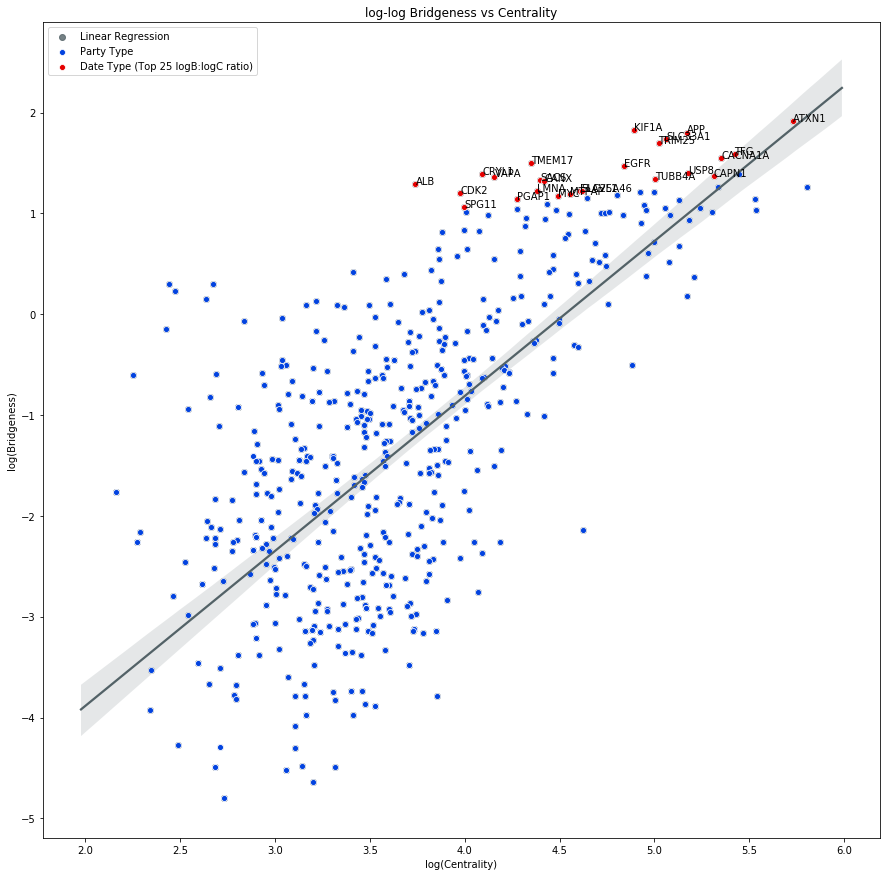

In [61]:
a4_dims = (15,15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='log_Cen', y='log_bridg', data=centrality_bridgeness_df, color='xkcd:gunmetal', label="Linear Regression")
sns.scatterplot(x='log_Cen', y='log_bridg', data=other_genes, color='xkcd:blue', label="Party Type")
top_10_plot = sns.scatterplot(x='log_Cen', y='log_bridg', data=top_10_ratio, color='xkcd:red', label="Date Type (Top 25 logB:logC ratio)")
for row in top_10_ratio.iterrows():
    name = row[1].nodeID
    x = row[1].log_Cen
    y = row[1].log_bridg
    top_10_plot.annotate(s=name, xy=[x,y])
    
plt.xlabel('log(Centrality)')
plt.ylabel('log(Bridgeness)')

plt.legend(loc='upper left')
plt.title("log-log Bridgeness vs Centrality")

In [ ]:
centrality_bridgeness_df.to_csv('')